# Discover Penguin Species

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme("talk")

In [2]:
# We will be using variables on different scales (length and weight), therefore we use the standard scaler
MyScaler = StandardScaler()

## Look on the data
Here we already now "natural" clusters, the biological species. The data set is an example data set in seaborn.

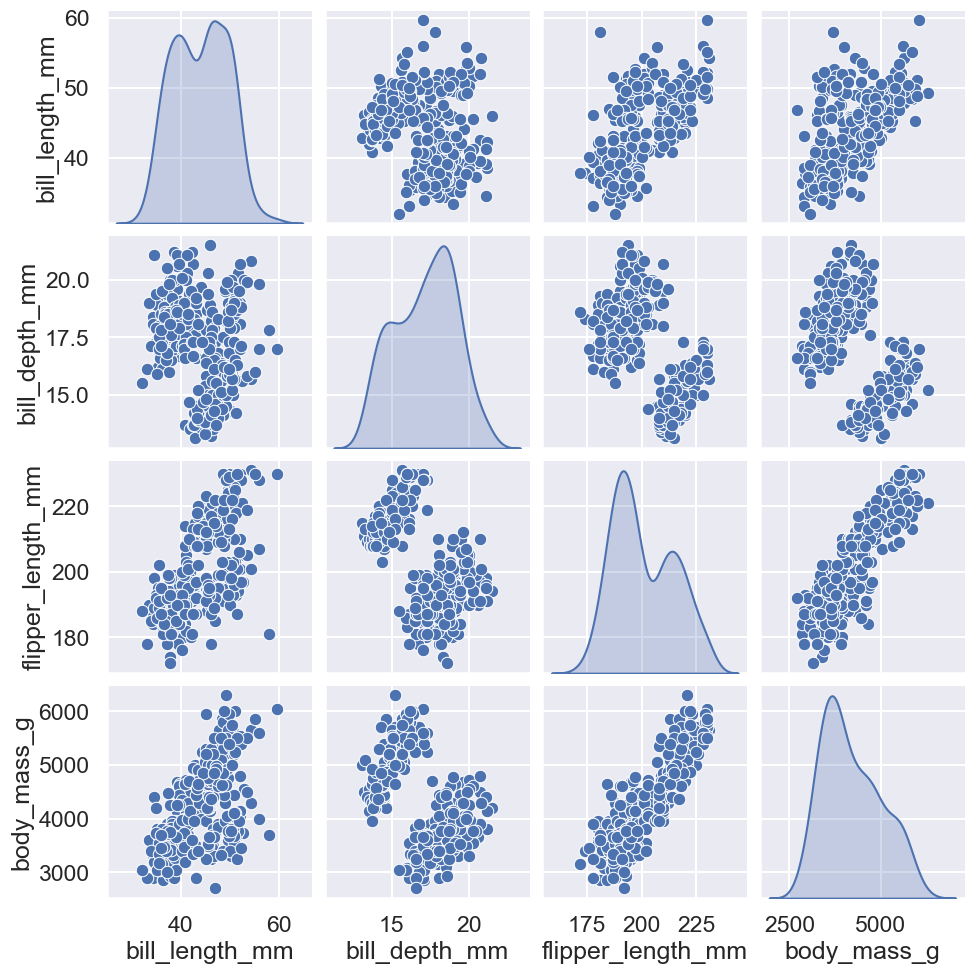

In [11]:
penguins = sns.load_dataset("penguins").dropna()
sns.pairplot(penguins, diag_kind="kde")#, hue="species", palette="husl");

In [4]:
# let's take the four columns (and not the species!) for our analysis
of_interest = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [5]:
penguins_scaled = MyScaler.fit_transform(penguins[of_interest])

In [14]:
# Using the elbow-heuristic let's find out how many clusters could be sensible
# calculate the clustering for each k and have a look to the loss term (intertia)
inertias = []
for k in range(2,6):
    cluster = KMeans(n_clusters=k, n_init=10) #calculate the clusters
    predictions = cluster.fit_predict(X=penguins_scaled) # assign the points to clusters
    inertias.append(cluster.inertia_) #append the current loss (for k)
    penguins["cluster_"+str(k)] = predictions #save in an extra column the clustering assignment for k

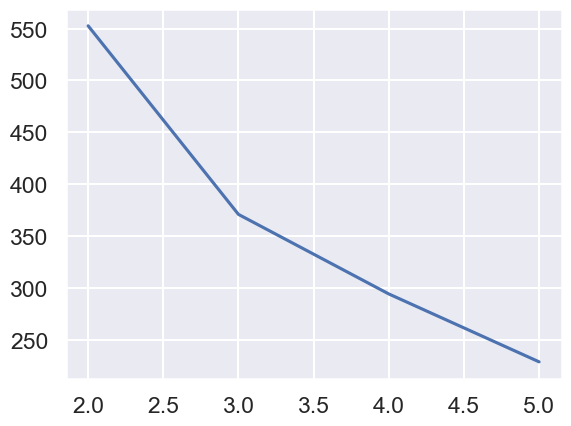

In [17]:
plt.plot(np.arange(2,6,1),inertias);

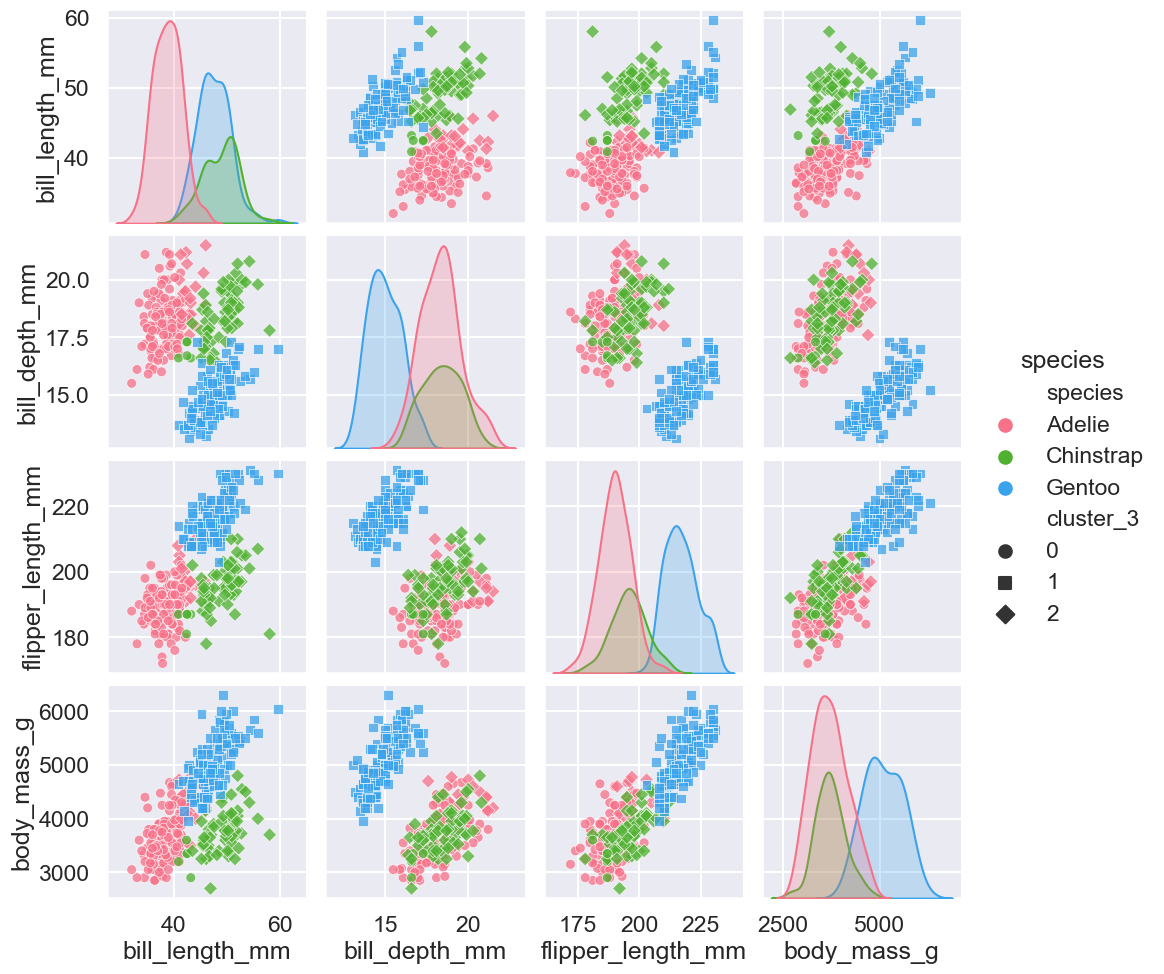

In [18]:
# so k=3 looks very promising, which is good as we know the "natural" clustering into three species
# we will be looking on our k-means clusters compared to the species clusters so we need an additional marker

number_to_marker = {0:"o", 1:"s", 2:"D", 3:"^", 4:"v", 5:"*"}
scatter_kws = {'s': 50, 'alpha': 0.75, 'style': penguins['cluster_3'],  'markers': number_to_marker}
sns.pairplot(penguins[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', "species"]], hue="species", plot_kws=scatter_kws, palette="husl");